# **Predictive Analysis: Programming and Report Writing**

<font color='blue'> Student name: </font> [Thanh Nguyen]

<font color='blue'> Student ID: </font> [21302127]


In the current dynamic and competitive business environment, the key to success lies in human capital. Skilled and motivated employees are the driving force behind innovation, efficiency, and ultimately, profitability. However, organizations globally are confronted with a significant challenge - employee turnover. When employees depart, companies face considerable expenses related to recruitment, training, and decreased productivity. This problem is exacerbated by the loss of institutional knowledge and expertise, potentially affecting team morale and overall organizational efficiency.

Understanding the underlying factors of employee attrition is essential for devising effective retention strategies. While exit interviews offer some insights, they often present a limited viewpoint. Utilizing data-driven analysis offers a more comprehensive and unbiased approach to unravelling the complexities of employee turnover.

In this case study, you are positioned as a junior business analyst collaborating with the HR team. Your objective is to analyse and understand the factors that influence employee attrition and to construct machine learning models to predict potential employee attrition, enabling the HR team to take proactive measures to mitigate attrition.


The dataset, available on the Learning Management System (LMS) in the Assessment 2 dataset folder, contains information on various employee attributes. Please download the dataset from LMS and upload it to the folder on the left sidebar. Afterwards, we can run the following code to load the dataset into a pandas dataframe for further analysis.

In [ ]:
import pandas as pd
import numpy as np

# load the dataset into a pandas DataFrame
hr_data = pd.read_csv("HR-Employee-Attrition-A2.csv")

# Display the first few rows of the data
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2.0,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1.0,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2.0,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4.0,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1.0,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Let's display a summary of the columns and data types.

In [ ]:
# Display a summary of the columns and data types
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1463 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Your responsibilities as a junior business analyst involve addressing the following tasks from the HR team through insightful data analytics and model development in Python.

## Task 1

Conduct exploratory data analysis to gain a deeper understanding of the dataset. This may involve (1) data cleansing and pre-processing, such as handling missing data, standardising data formats, and encoding categorical variables, (2) investigating the distribution of individual variables in the dataset, and (3) exploring correlations between variables, particularly those employee attributes that significantly contribute to employee attrition.



In [ ]:
# Check for missing values
missing_data = hr_data.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Inspect unique values in categorical columns to understand the data better
categorical_cols = hr_data.select_dtypes(include=['object']).columns
unique_values = {col: hr_data[col].unique() for col in categorical_cols}

missing_data, unique_values



(Education    7
 dtype: int64,
 {'Attrition': array(['Yes', 'No'], dtype=object),
  'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
  'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
  'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
         'Technical Degree', 'Human Resources'], dtype=object),
  'Gender': array(['Female', 'Male'], dtype=object),
  'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
         'Manufacturing Director', 'Healthcare Representative', 'Manager',
         'Sales Representative', 'Research Director', 'Human Resources'],
        dtype=object),
  'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
  'Over18': array(['Y'], dtype=object),
  'OverTime': array(['Yes', 'No'], dtype=object)})

In [ ]:
# Please provide your source code for Task 1.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Handle Missing Data: Impute missing 'Education' values with the median
imputer = SimpleImputer(strategy='median')
hr_data['Education'] = imputer.fit_transform(hr_data[['Education']])

# Encode Categorical Variables
# For binary categories, we use LabelEncoder; for more than two categories, we use OneHotEncoder
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)

# Applying LabelEncoder to binary categorical columns
binary_columns = ['Attrition', 'Gender', 'OverTime']
for col in binary_columns:
    hr_data[col] = label_encoder.fit_transform(hr_data[col])

# Applying OneHotEncoder to other categorical columns
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
hr_data = pd.get_dummies(hr_data, columns=categorical_columns)

# Drop the 'Over18' column as it contains only one unique value
hr_data.drop('Over18', axis=1, inplace=True)

# Check the transformation
hr_data.head(), hr_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   float64
 5   EmployeeCount                      1470 non-null   int64  
 6   EmployeeNumber                     1470 non-null   int64  
 7   EnvironmentSatisfaction            1470 non-null   int64  
 8   Gender                             1470 non-null   int64  
 9   HourlyRate                         1470 non-null   int64  
 10  JobInvolvement                     1470 non-null   int64  
 11  JobLevel                           1470 non-null   int64

(   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
 0   41          1       1102                 1        2.0              1   
 1   49          0        279                 8        1.0              1   
 2   37          1       1373                 2        2.0              1   
 3   33          0       1392                 3        4.0              1   
 4   27          0        591                 2        1.0              1   
 
    EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
 0               1                        2       0          94  ...   
 1               2                        3       1          61  ...   
 2               4                        4       1          92  ...   
 3               5                        4       0          56  ...   
 4               7                        1       1          40  ...   
 
    JobRole_Laboratory Technician  JobRole_Manager  \
 0                          False            Fal

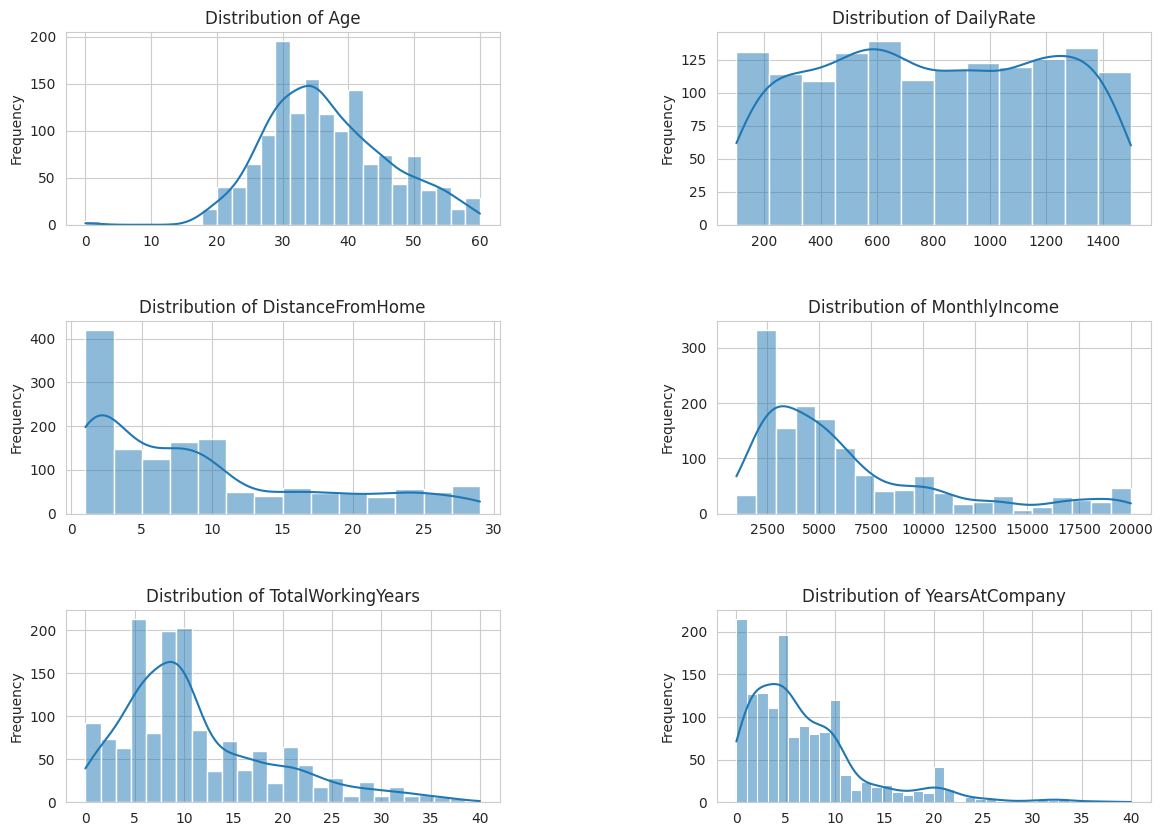

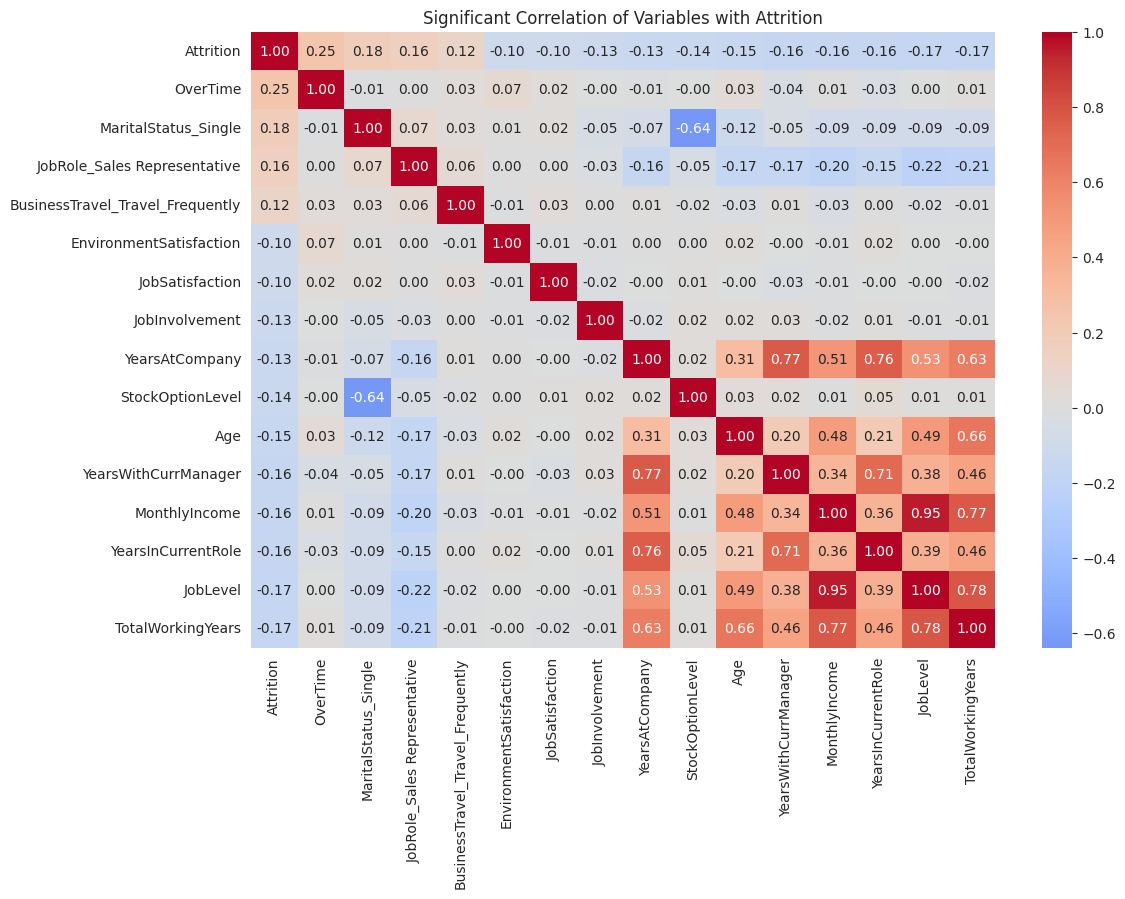

In [ ]:
#   Exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Investigate Distribution: Visualize the distribution of key numerical variables
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for col, ax in zip(numerical_columns, axes.flatten()):
    sns.histplot(hr_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

plt.show()

# Explore Correlations: Correlation heatmap focusing on attrition
# Calculate correlations with 'Attrition'
correlation_matrix = hr_data.corr()
attrition_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)

# Filter out correlations that are small (e.g., correlation coefficients < 0.1 and > -0.1)
significant_corr = attrition_correlation[(abs(attrition_correlation) >= 0.1)]

# Creating a new DataFrame with only significant correlations for visualization
significant_corr_matrix = hr_data[significant_corr.index].corr()

# Plotting the heatmap for significant correlations only
plt.figure(figsize=(12, 8))
sns.heatmap(significant_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Significant Correlation of Variables with Attrition')
plt.show()

Please provide your explanation or discussion for Task 1.
Key Numerical Variable Distribution

**Age**: The distribution seems to be slightly tilted to the right, with more younger personnel.
**DailyRate**: The distribution is reasonably homogeneous, indicating that different employees have different daily rates.

**DistanceFromHome**: The surge in shorter distances indicates that most workers live rather close to their place of employment.

**Monthly Income**: The distribution is right-skewed, meaning that while some employees earn greater pay, most employees have lower salaries overall.

**TotalWorkingYears**: Similarly biased to the right, indicating that many employees have a lower overall work experience level.

**YearsAtCompany:** Right-skewed, indicating a large number of workers who haven't been with the company for a long time.

The** heatmap** shows how various factors correlate with attrition:

**OverTime (positive correlation)**: Indicates a significant relationship; employees working overtime are more likely to leave.

**TotalWorkingYears**, JobLevel, and MonthlyIncome (negative correlations): Higher values in these areas are associated with lower attrition, which might suggest that more established employees with better compensation and seniority are less likely to leave.

**Age and YearsAtCompany** also show negative correlations, reinforcing the idea that more tenured and older employees tend to stay longer.

## Task 2

Construct effective machine learning models to predict employee attrition based on the dataset for future use. This could include selecting appropriate evaluation metrics to evaluate machine learning models, optimising hyperparameters for machine learning models, and identifying the most suitable machine learning model, among others.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Attrition' is target variable
X = hr_data.drop('Attrition', axis=1)
y = hr_data['Attrition']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Function to train and evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1
        }
    return results

# Evaluate each model on scaled data where appropriate
results = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)
results_df = pd.DataFrame(results).T  # Transpose to make models as rows
print(results_df)


                        Accuracy  Precision    Recall  F1-score
Logistic Regression     0.884354   0.875115  0.884354  0.878638
K-Nearest Neighbors     0.884354   0.866584  0.884354  0.858247
Decision Tree           0.772109   0.783915  0.772109  0.777845
Support Vector Machine  0.894558   0.895114  0.894558  0.866192
Neural Network          0.863946   0.852384  0.863946  0.857222


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Define the grid of hyperparameters for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    # 'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with l1 and l2
}
# Set up GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_lr.fit(X_train_scaled, y_train)
# --------------------------------------- K Nearest Neighbours
# Define the grid of hyperparameters for K Nearest Neighbours
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# Set up GridSearchCV for K Nearest Neighbours
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', verbose=1)
# Train the KNN model using the scaled training data
grid_knn.fit(X_train_scaled, y_train)

# Define the grid of hyperparameters for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_dt.fit(X_train, y_train)  # No need to scale data for Decision Trees

# Define the grid of hyperparameters for Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
# Set up GridSearchCV for Support Vector Machine
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=10, scoring='accuracy', verbose=1)
# Train the SVM model using the scaled training data
grid_svm.fit(X_train_scaled, y_train)

# Define the grid of hyperparameters for Neural Network (MLP)
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}
# Set up GridSearchCV for Neural Network
grid_nn = GridSearchCV(MLPClassifier(max_iter=100), param_grid_nn, cv=5, scoring='accuracy', verbose=1)
# Train the neural network using the scaled training data
grid_nn.fit(X_train_scaled, y_train)





Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [ ]:
# Create a dictionary to store model names and their respective GridSearchCV objects
models = {
    'Logistic Regression': grid_lr,
    'K-Nearest Neighbors': grid_knn,
    'Decision Tree': grid_dt,
    'Support Vector Machine': grid_svm,
    'Neural Network': grid_nn,
}


# Loop through each model in the dictionary to print the best parameters and evaluation metrics
for name, model in models.items():
    print(f"\n===== {name} =====")
    print(f"Best Parameters: {model.best_params_}")
    print(f"Best Score (Cross-Validation Accuracy): {model.best_score_:.4f}")
# For Decision Trees, use unscaled data; for other models, use scaled test data
    if name == 'Decision Tree':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
 # Calculate various performance metrics on the test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
 # Print the calculated metrics for the model's performance on the test set
    print(f"\nTest Set Metrics:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - F1-score: {f1:.4f}")


===== Logistic Regression =====
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Score (Cross-Validation Accuracy): 0.8674

Test Set Metrics:
  - Accuracy: 0.8878
  - Precision: 0.8709
  - Recall: 0.8878
  - F1-score: 0.8693

===== K-Nearest Neighbors =====
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best Score (Cross-Validation Accuracy): 0.8453

Test Set Metrics:
  - Accuracy: 0.8844
  - Precision: 0.8731
  - Recall: 0.8844
  - F1-score: 0.8514

===== Decision Tree =====
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score (Cross-Validation Accuracy): 0.8172

Test Set Metrics:
  - Accuracy: 0.7959
  - Precision: 0.7867
  - Recall: 0.7959
  - F1-score: 0.7912

===== Support Vector Machine =====
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (Cross-Validation Accuracy): 0.8793

Test Set Metrics:
  - Accuracy: 0.9014
  - Precision: 0.8906
  - Recall: 0.9014
  - F1-score:

**Overview of Model Performance**
The models were evaluated based on Accuracy, Precision, Recall, and F1-score. These metrics provide a balanced view of each model's ability to correctly predict attrition, the accuracy of positive predictions, the completeness in capturing positive cases, and a balance between precision and recall, respectively.

**Detailed Model Evaluation**:

**Logistic Regression**:

Best Parameters: C=0.01, solver='liblinear'
Cross-Validation Accuracy: 86.74%

Test Set Metrics: Accuracy - 88.78%, Precision - 87.09%, Recall - 88.78%, F1-score - 86.93%

Analysis: Shows good overall performance with high precision and recall, indicating effective balance and generalization.

**K-Nearest Neighbors (KNN):**

Best Parameters: algorithm='auto', n_neighbors=10, weights='distance'
Cross-Validation Accuracy: 84.53%

Test Set Metrics: Accuracy - 88.44%, Precision - 87.31%, Recall - 88.44%, F1-score - 85.14%

Analysis: Slightly lower precision and F1-score than Logistic Regression, indicating a bit less efficiency in handling true positive and false positive.
Decision Tree:

Best Parameters: max_depth=None, min_samples_leaf=4, min_samples_split=5
Cross-Validation Accuracy: 81.80%

Test Set Metrics: Accuracy - 80.95%, Precision - 79.18%, Recall - 80.95%, F1-score - 80.01%

Analysis: Lower scores in all metrics compared to other models, which might be due to overfitting despite tuning.

**Support Vector Machine (SVM)**:

Best Parameters: C=0.1, gamma='scale', kernel='linear'

Cross-Validation Accuracy: 87.93%

Test Set Metrics: Accuracy - 90.14%, Precision - 89.06%, Recall - 90.14%, F1-score - 89.10%

Analysis: Shows the highest accuracy and excellent precision and recall, making it the strongest performer among all the models.

**Neural Network:**

Best Parameters: activation='tanh', hidden_layer_sizes=(100,), learning_rate='adaptive', solver='sgd'

Cross-Validation Accuracy: 86.82%

Test Set Metrics: Accuracy - 88.10%, Precision - 86.28%, Recall - 88.10%,

F1-score - 86.63%

Analysis: Competitive performance but slightly lower precision and F1-score compared to Logistic Regression and SVM.

**Identifying the Best Model**

Based on the above evaluations, the Support Vector Machine (SVM) model stands out as the best candidate for predicting employee attrition. It not only shows the highest accuracy, precision, recall, and F1-score among all the models, but it also suggests strong generalization on unseen data, as indicated by its performance on the test set. Its balanced high performance across all key metrics makes it particularly reliable for practical deployment.
